# CE7454 Project - Group 05

Lu Yuhao, Xue Chuhui, Wu Rongliang, Zhan Fangneng


## Part I. Project Description

Generative Adversarial Networks (GANs) has attracted increasing attention in recent years due to its significant performances on image generation task. In general, sample images are generated by a generator, then both input images and generated images are passed into a discriminator which decides if a image is real or generated. During this process, the generator tries to generate images that are hard for discriminator to judge, and discriminator tries to guide the generator to produce more realistic images. In this project, we will focus on some recent advanced architectures of GANs, like CycleGAN, StarGAN. The goal of this project is to generate cartoon (anime) faces for real faces.


## Part II. Data Acquisition

Real faces:
CelebA dataset: details in http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

Anime faces:
As we did not find any datasets that contains faces of anime characters, we need to create a datset by ourselves.

After looking through famous websites that have anime images, we decide to download anime images from http://konachan.net/

In [2]:
import os
import requests
from bs4 import BeautifulSoup

Define download function which is to download image and save to corresponding path (details in src/image_downloader.py)

In [2]:
from src import image_downloader

Create folder for saving images if it does not exist

In [3]:
if os.path.exists('data/anime/imgs') is False:
    os.makedirs('data/anime/imgs')

Indicate range of website index (on http://konachan.net/)
Note that each multiple images will be downloaded on one page

In [4]:
start = 1
end = 3

Download image and save under folder 'imgs'

In [5]:
for i in range(start, end + 1):
    url = 'http://konachan.net/post?page={}&tags='.format(i)
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    for img in soup.find_all('img', class_="preview"):
        target_url = img['src']
        filename = os.path.join('data/anime/imgs', target_url.split('/')[-1])
        image_downloader.download(target_url, filename)
        
    print('{} / {}'.format(i, end))

1 / 3
2 / 3
3 / 3


## Part III. Data Exploration

We visualize several downloaded images from anime image website.

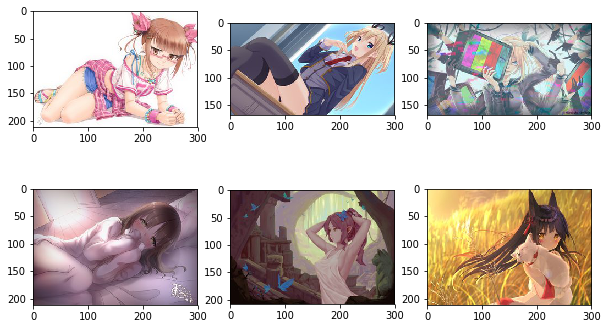

In [11]:
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_list = glob('data/anime/imgs/*.jpg')
w = 10
h = 10
fig = plt.figure(figsize=(10, 6))
columns = 3
rows = 2
for i in range(1, columns*rows + 1):
    img = mpimg.imread(file_list[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

We could see that most of images contain large amount of background or human bodies that we do not need. Therefore, we need to detect and crop the faces of each character.

## Part IV. Preprocessing

We use a pretrained model provided by http://ultraist.hatenablog.com/entry/20110718/1310965532 and OpenCV function CascadeClassifier for anime face detection. 

Each detected faces will be cropped and saved into folder 'faces'. 

All detected faces with score less than 2 or size less than 48 * 48 will be filtered out. 

Details of face detection and cropping can be found at src/anime_face_detector.py.

In [7]:
from src import anime_face_detector

Create folder for saving cropped faces

In [8]:
if os.path.exists('data/anime/faces') is False:
    os.makedirs('data/anime/faces')

Detect and crop faces from all downloaded images

In [9]:
file_list = glob('data/anime/imgs/*.jpg')
pretrained_model = "data/anime/pretrained_model/lbpcascade_animeface.xml"
for filename in file_list:
    anime_face_detector.detect(filename, pretrained_model)

Visualize cropped faces

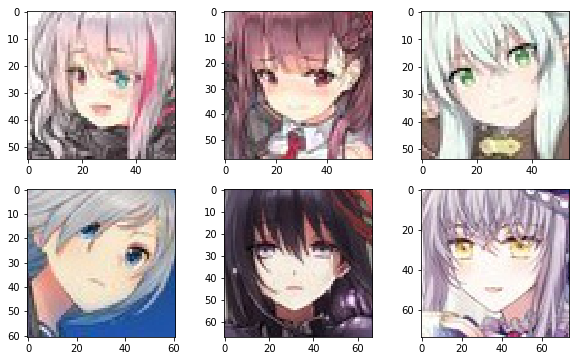

In [10]:
file_list = glob('data/anime/faces/*.jpg')
fig = plt.figure(figsize=(10, 6))
columns = 3
rows = 2
for i in range(1, columns*rows + 1):
    img = mpimg.imread(file_list[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# LYH 's part

In [3]:
cur_dir = os.getcwd()
print(cur_dir)

/home/yuhao/Projects/CE7454_Project_Group_5


### Model 1- A neural algorithm of artistic style

Refer to details in the following notebook:
#####                           end2end_and_artistic_style_transfer/neural_artistic_style/neural_style_transfer.ipynb

In [4]:
os.chdir('end2end_and_artistic_style_transfer/neural_artistic_style/')

%run neural_style_transfer.ipynb

os.chdir(cur_dir)

<Figure size 640x480 with 1 Axes>

1 / 13
2 / 13


KeyboardInterrupt: 

### Model 2- End-to-end neural style transfer

Refer to details in the following notebook: (for training)
#####                           end2end_and_artistic_style_transfer/end2end_neural_style_transfer/pytorch-CycleGAN-and-pix2pixipynb

In [ ]:
os.chdir('end2end_and_artistic_style_transfer/end2end_neural_style_transfer/')

%run stylize.py  ../../trained_models/end2end_cnt1_2.pth ../../data/testA/ ../../outputs/end2end_neural_transfer/   

os.chdir(cur_dir)

### Model 3 - CycleGAN

Refer to details in the following file:
#####           pytorch-CycleGAN-and-pix2pix/models/cycle_gan_model.py

In [ ]:
os.chdir('pytorch-CycleGAN-and-pix2pix/')

%run test.py --dataroot ../data/ --name celeba2comic_origin  --model cycle_gan  --direction AtoB --results_dir ../outputs/cycleGAN

print('end...saved to >> ../outputs/cycleGAN/')
os.chdir(cur_dir)